In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments
using RLIntro.MaximizationBias

In [2]:
using Plots, StatsBase

In [3]:
mutable struct CountOfLeft <: AbstractHook
    counts::Vector{Int}
    count::Int
    CountOfLeft() = new([],0)
end

function (f::CountOfLeft)(::PreActStage, agent, env, obs_action)
    obs, action = obs_action
    if get_state(obs) == 1 && action == MaximizationBias.LEFT
        f.count += 1
    end
end

function (f::CountOfLeft)(::PostEpisodeStage, agent, env, obs)
    push!(f.counts, f.count)
    f.count = 0
end


In [4]:
env = MaximizationBiasEnv()
ns, na = length(observation_space(env)), length(action_space(env))

(3, 10)

In [5]:
init_double_Q_agent() = Agent(
    π=QBasedPolicy(
        learner=DoubleLearner(
            L1=TDLearner(
                approximator=TabularQApproximator(n_state=ns, n_action=na),
                optimizer=Descent(0.1),
                method=:SARS
                ),
            L2=TDLearner(
                approximator=TabularQApproximator(n_state=ns, n_action=na),
                optimizer=Descent(0.1),
                method=:SARS
                )
            ),
        selector=EpsilonGreedySelector(0.1)
        ),
    buffer=episode_RTSA_buffer()
)

init_Q_agent() = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(n_state=ns, n_action=na),
            optimizer=Descent(0.1),
            method=:SARS
            ),
        selector=EpsilonGreedySelector(0.1)
        ),
    buffer=episode_RTSA_buffer()
)

init_Q_agent (generic function with 1 method)

Progress:   0%|█                                        |  ETA: 0:03:46
4m  TRAINING/EPISODE:  0
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  TRAINING/EPISODE:  264


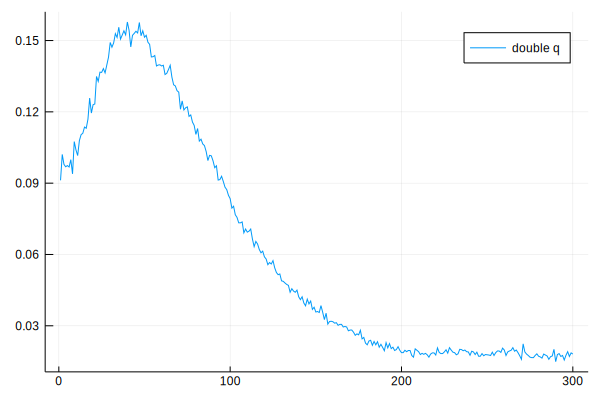

In [6]:
stats = []
for _ in 1:10000
    hook = CountOfLeft()
    run(init_double_Q_agent(), env, StopAfterEpisode(300);hook=hook)
    push!(stats, hook.counts)
end

plot(mean(stats), legend=:topright, label="double q")

Progress:   0%|█                                        |  ETA: 0:01:08
4m  TRAINING/EPISODE:  0
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/EPISODE:  162
Progress:  16%|███████                                  |  ETA: 0:00:01
4m  TRAINING/EPISODE:  36
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/EPISODE:  168


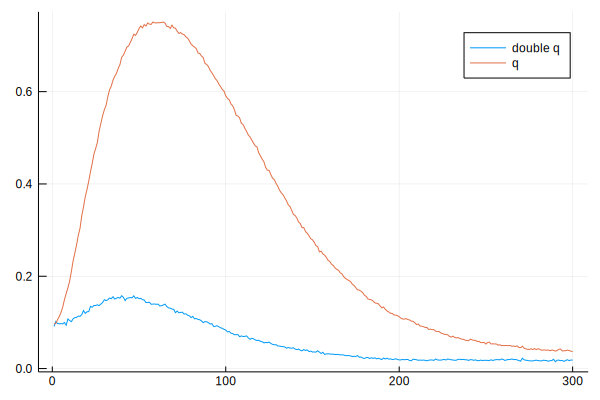

In [7]:
stats = []
for _ in 1:10000
    hook = CountOfLeft()
    run(init_Q_agent(), env, StopAfterEpisode(300);hook=hook)
    push!(stats, hook.counts)
end
plot!(mean(stats), legend=:topright, label="q")

# TODO

We need to add a legal action here to restrict that the actions of the first step can only be 1(left) or 2(right). So that the figure will look exactly like the one on the book.